#Installing dependencies

In [1]:

!pip install scikit-plot

#Importing libraries

In [2]:
import math
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import joblib
import seaborn as sns #visualization
import json
import pickle #saving the model
import scikitplot as skplt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from statistics import stdev
from warnings import simplefilter

import warnings
warnings.filterwarnings('ignore')


In [3]:
#reading the .xlsx dataset in to the dataframe
df1 = pd.read_excel("C:/Users/admin/Desktop/Predictive-Analysis/Baitaplon/Customer/Data/Data v1.0.xlsx")

In [4]:
df1.head()

,ID,Gender,Age,Ethnic,Occupation,Annual Income,Social Media usage,Experience of purchasing due to social media influence,Reviews and rating impact on purchasing decision,Average time spent on the Internet (weekly),...,Attitude 3 (ATTD3),Attitude 4 (ATTD4),Social Norms 1 (SN1),Social Norms 2 (SN2),Social Norms 3 (SN3),Social Norms 4 (SN4),Perceived Behavioural Control 1 (PBC1),Perceived Behavioural Control 2 (PBC2),Perceived Behavioural Control 3 (PBC3),Perceived Behavioural Control 4 (PBC4)
0,1,Female,29 - 34 Years Old,Chinese,Homemaker,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
1,2,Male,23 - 28 Years Old,Chinese,Student,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,...,Agree,Neutral,Strongly disagree,Disagree,Agree,Neutral,Neutral,Agree,Disagree,Disagree
2,3,Female,29 - 34 Years Old,Chinese,Homemaker,"Less than RM30,000",Yes,Yes,Yes,5 hours – 10 hours,...,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
3,4,Male,35 - 40 Years Old,Malay,Businessman,"More than RM90,001",Yes,Yes,No,1 hour – 4 hours,...,Agree,Neutral,Neutral,Neutral,Agree,Agree,Neutral,Agree,Neutral,Agree
4,5,Female,23 - 28 Years Old,Chinese,Employee,"RM70,001-RM90,000",Yes,Yes,Yes,10 hours – 20 hours,...,Agree,Agree,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Agree,Agree


In [5]:
df1.shape

(219, 27)

In [6]:
df1.columns

Index(['ID', 'Gender', 'Age', 'Ethnic', 'Occupation', 'Annual Income',
       'Social Media usage',
       'Experience of purchasing due to social media influence',
       'Reviews and rating impact on purchasing decision',
       'Average time spent on the Internet (weekly)',
       'Attention to advertisement on social media',
       'Purchase Behaviour 1 (PB1)', 'Purchase Behaviour 2 (PB2)',
       'Purchase Behaviour 3 (PB3)', 'Purchase Behaviour 4 (PB4)',
       'Attitude 1 (ATTD1)', 'Attitude 2 (ATTD2)', 'Attitude 3 (ATTD3)',
       'Attitude 4 (ATTD4)', 'Social Norms 1 (SN1)', 'Social Norms 2 (SN2)',
       'Social Norms 3 (SN3)', 'Social Norms 4 (SN4)',
       'Perceived Behavioural Control 1 (PBC1)',
       'Perceived Behavioural Control 2 (PBC2)',
       'Perceived Behavioural Control 3 (PBC3)',
       'Perceived Behavioural Control 4 (PBC4)'],
      dtype='object')

In [7]:
df1.nunique()

ID                                                        219
Gender                                                      2
Age                                                         5
Ethnic                                                      4
Occupation                                                  5
Annual Income                                               5
Social Media usage                                          2
Experience of purchasing due to social media influence      2
Reviews and rating impact on purchasing decision            2
Average time spent on the Internet (weekly)                 5
Attention to advertisement on social media                  2
Purchase Behaviour 1 (PB1)                                  5
Purchase Behaviour 2 (PB2)                                  5
Purchase Behaviour 3 (PB3)                                  5
Purchase Behaviour 4 (PB4)                                  5
Attitude 1 (ATTD1)                                          5
Attitude

# Exploratory Data Analysis (EDA)

In [8]:
#droping the column ID since it's not important
df2 = df1.drop(['ID'],axis=1)
df2.head()

,Gender,Age,Ethnic,Occupation,Annual Income,Social Media usage,Experience of purchasing due to social media influence,Reviews and rating impact on purchasing decision,Average time spent on the Internet (weekly),Attention to advertisement on social media,...,Attitude 3 (ATTD3),Attitude 4 (ATTD4),Social Norms 1 (SN1),Social Norms 2 (SN2),Social Norms 3 (SN3),Social Norms 4 (SN4),Perceived Behavioural Control 1 (PBC1),Perceived Behavioural Control 2 (PBC2),Perceived Behavioural Control 3 (PBC3),Perceived Behavioural Control 4 (PBC4)
0,Female,29 - 34 Years Old,Chinese,Homemaker,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
1,Male,23 - 28 Years Old,Chinese,Student,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,Agree,Neutral,Strongly disagree,Disagree,Agree,Neutral,Neutral,Agree,Disagree,Disagree
2,Female,29 - 34 Years Old,Chinese,Homemaker,"Less than RM30,000",Yes,Yes,Yes,5 hours – 10 hours,No,...,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
3,Male,35 - 40 Years Old,Malay,Businessman,"More than RM90,001",Yes,Yes,No,1 hour – 4 hours,Yes,...,Agree,Neutral,Neutral,Neutral,Agree,Agree,Neutral,Agree,Neutral,Agree
4,Female,23 - 28 Years Old,Chinese,Employee,"RM70,001-RM90,000",Yes,Yes,Yes,10 hours – 20 hours,No,...,Agree,Agree,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Agree,Agree


In [9]:
df2.isnull().any()

Gender                                                    False
Age                                                       False
Ethnic                                                    False
Occupation                                                False
Annual Income                                             False
Social Media usage                                        False
Experience of purchasing due to social media influence    False
Reviews and rating impact on purchasing decision          False
Average time spent on the Internet (weekly)               False
Attention to advertisement on social media                False
Purchase Behaviour 1 (PB1)                                False
Purchase Behaviour 2 (PB2)                                False
Purchase Behaviour 3 (PB3)                                False
Purchase Behaviour 4 (PB4)                                False
Attitude 1 (ATTD1)                                        False
Attitude 2 (ATTD2)                      

In [10]:
df2.isnull().sum()

Gender                                                    0
Age                                                       0
Ethnic                                                    0
Occupation                                                0
Annual Income                                             0
Social Media usage                                        0
Experience of purchasing due to social media influence    0
Reviews and rating impact on purchasing decision          0
Average time spent on the Internet (weekly)               0
Attention to advertisement on social media                0
Purchase Behaviour 1 (PB1)                                0
Purchase Behaviour 2 (PB2)                                0
Purchase Behaviour 3 (PB3)                                0
Purchase Behaviour 4 (PB4)                                0
Attitude 1 (ATTD1)                                        0
Attitude 2 (ATTD2)                                        0
Attitude 3 (ATTD3)                      

In [11]:
df2 = df2.dropna(how='any',axis=0)
df2.isnull().sum()

Gender                                                    0
Age                                                       0
Ethnic                                                    0
Occupation                                                0
Annual Income                                             0
Social Media usage                                        0
Experience of purchasing due to social media influence    0
Reviews and rating impact on purchasing decision          0
Average time spent on the Internet (weekly)               0
Attention to advertisement on social media                0
Purchase Behaviour 1 (PB1)                                0
Purchase Behaviour 2 (PB2)                                0
Purchase Behaviour 3 (PB3)                                0
Purchase Behaviour 4 (PB4)                                0
Attitude 1 (ATTD1)                                        0
Attitude 2 (ATTD2)                                        0
Attitude 3 (ATTD3)                      

In [12]:
df2.shape
df2.head(20)

,Gender,Age,Ethnic,Occupation,Annual Income,Social Media usage,Experience of purchasing due to social media influence,Reviews and rating impact on purchasing decision,Average time spent on the Internet (weekly),Attention to advertisement on social media,...,Attitude 3 (ATTD3),Attitude 4 (ATTD4),Social Norms 1 (SN1),Social Norms 2 (SN2),Social Norms 3 (SN3),Social Norms 4 (SN4),Perceived Behavioural Control 1 (PBC1),Perceived Behavioural Control 2 (PBC2),Perceived Behavioural Control 3 (PBC3),Perceived Behavioural Control 4 (PBC4)
0,Female,29 - 34 Years Old,Chinese,Homemaker,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
1,Male,23 - 28 Years Old,Chinese,Student,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,Agree,Neutral,Strongly disagree,Disagree,Agree,Neutral,Neutral,Agree,Disagree,Disagree
2,Female,29 - 34 Years Old,Chinese,Homemaker,"Less than RM30,000",Yes,Yes,Yes,5 hours – 10 hours,No,...,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
3,Male,35 - 40 Years Old,Malay,Businessman,"More than RM90,001",Yes,Yes,No,1 hour – 4 hours,Yes,...,Agree,Neutral,Neutral,Neutral,Agree,Agree,Neutral,Agree,Neutral,Agree
4,Female,23 - 28 Years Old,Chinese,Employee,"RM70,001-RM90,000",Yes,Yes,Yes,10 hours – 20 hours,No,...,Agree,Agree,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Agree,Agree
5,Female,23 - 28 Years Old,Chinese,Student,"Less than RM30,000",Yes,Yes,Yes,10 hours – 20 hours,Yes,...,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree
6,Female,17 - 22 Years Old,Chinese,Student,"RM30,001-RM50,000",Yes,Yes,Yes,1 hour – 4 hours,Yes,...,Strongly agree,Agree,Agree,Agree,Strongly agree,Agree,Agree,Strongly agree,Agree,Strongly agree
7,Male,35 - 40 Years Old,Chinese,Businessman,"More than RM90,001",Yes,Yes,Yes,20 hours – 40 hours,No,...,Disagree,Disagree,Disagree,Agree,Disagree,Strongly agree,Strongly agree,Agree,Neutral,Neutral
8,Female,23 - 28 Years Old,Chinese,Businessman,"More than RM90,001",No,Yes,Yes,More than 40 hours,Yes,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
9,Male,17 - 22 Years Old,Chinese,Businessman,"More than RM90,001",Yes,Yes,Yes,1 hour – 4 hours,Yes,...,Agree,Agree,Agree,Agree,Agree,Neutral,Neutral,Neutral,Agree,Neutral


In [13]:
df2.nunique()

Gender                                                    2
Age                                                       5
Ethnic                                                    4
Occupation                                                5
Annual Income                                             5
Social Media usage                                        2
Experience of purchasing due to social media influence    2
Reviews and rating impact on purchasing decision          2
Average time spent on the Internet (weekly)               5
Attention to advertisement on social media                2
Purchase Behaviour 1 (PB1)                                5
Purchase Behaviour 2 (PB2)                                5
Purchase Behaviour 3 (PB3)                                5
Purchase Behaviour 4 (PB4)                                5
Attitude 1 (ATTD1)                                        5
Attitude 2 (ATTD2)                                        5
Attitude 3 (ATTD3)                      

In [14]:
df2.rename(columns={'Annual Income': 'Annual_Income',
                   'Social Media usage': 'Social_Media_usage',
                   'Experience of purchasing due to social media influence': 'Experience',
                   'Reviews and rating impact on purchasing decision': 'Reviews_and_rating',
                   'Average time spent on the Internet (weekly)': 'ATI',
                   'Attention to advertisement on social media': 'ADSM',
                   'Purchase Behaviour 1 (PB1)': 'PB1',
                   'Purchase Behaviour 2 (PB2)': 'PB2',
                   'Purchase Behaviour 3 (PB3)': 'PB3',
                   'Purchase Behaviour 4 (PB4)': 'PB4',
                   'Attitude 1 (ATTD1)': 'ATTD1',
                   'Attitude 2 (ATTD2)': 'ATTD2',
                   'Attitude 3 (ATTD3)': 'ATTD3',
                   'Attitude 4 (ATTD4)': 'ATTD4',
                   'Social Norms 1 (SN1)': 'SN1',
                   'Social Norms 2 (SN2)': 'SN2',
                   'Social Norms 3 (SN3)': 'SN3',
                   'Social Norms 4 (SN4)': 'SN4',
                   'Perceived Behavioural Control 1 (PBC1)': 'PBC1',
                   'Perceived Behavioural Control 2 (PBC2)': 'PBC2',
                   'Perceived Behavioural Control 3 (PBC3)': 'PBC3',
                   'Perceived Behavioural Control 4 (PBC4)': 'PBC4',
                   },
          inplace=True, errors='raise')

In [15]:
df2.head()

,Gender,Age,Ethnic,Occupation,Annual_Income,Social_Media_usage,Experience,Reviews_and_rating,ATI,ADSM,...,ATTD3,ATTD4,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4
0,Female,29 - 34 Years Old,Chinese,Homemaker,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
1,Male,23 - 28 Years Old,Chinese,Student,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,Agree,Neutral,Strongly disagree,Disagree,Agree,Neutral,Neutral,Agree,Disagree,Disagree
2,Female,29 - 34 Years Old,Chinese,Homemaker,"Less than RM30,000",Yes,Yes,Yes,5 hours – 10 hours,No,...,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
3,Male,35 - 40 Years Old,Malay,Businessman,"More than RM90,001",Yes,Yes,No,1 hour – 4 hours,Yes,...,Agree,Neutral,Neutral,Neutral,Agree,Agree,Neutral,Agree,Neutral,Agree
4,Female,23 - 28 Years Old,Chinese,Employee,"RM70,001-RM90,000",Yes,Yes,Yes,10 hours – 20 hours,No,...,Agree,Agree,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Agree,Agree


In [16]:
df2.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [17]:
df2.Age.unique()

array(['29 - 34 Years Old', '23 - 28 Years Old', '35 - 40 Years Old',
       '17 - 22 Years Old', 'Others'], dtype=object)

In [18]:
df2.Ethnic.unique()

array(['Chinese', 'Malay', 'Indian', 'Others'], dtype=object)

In [19]:
df2.Occupation.unique()

array(['Homemaker', 'Student', 'Businessman', 'Employee', 'Retired'],
      dtype=object)

In [20]:
df2.Annual_Income.unique()

array(['RM50,001-RM70,000', 'Less than RM30,000', 'More than RM90,001',
       'RM70,001-RM90,000', 'RM30,001-RM50,000'], dtype=object)

In [21]:
df2.Social_Media_usage.unique()

array(['Yes', 'No'], dtype=object)

In [22]:
df2.Experience.unique()

array(['Yes', 'No'], dtype=object)

In [23]:
df2.Reviews_and_rating.unique()

array(['Yes', 'No'], dtype=object)

In [24]:
df2.ATI.unique()

array(['More than 40 hours', '5 hours – 10 hours', '1 hour – 4 hours',
       '10 hours – 20 hours', '20 hours – 40 hours'], dtype=object)

In [25]:
df2.ADSM.unique()

array(['Yes', 'No'], dtype=object)

In [26]:
df2.PB1.unique()

array(['Neutral', 'Agree', 'Strongly disagree', 'Strongly agree',
       'Disagree'], dtype=object)

In [27]:
df2.PB2.unique()

array(['Neutral', 'Agree', 'Strongly disagree', 'Strongly agree',
       'Disagree'], dtype=object)

In [28]:
df2.PB3.unique()

array(['Neutral', 'Disagree', 'Strongly disagree', 'Agree',
       'Strongly agree'], dtype=object)

In [29]:
df2.PB4.unique()

array(['Neutral', 'Strongly agree', 'Disagree', 'Agree',
       'Strongly disagree'], dtype=object)

In [30]:
df2.ATTD1.unique()
df2.ATTD2.unique()
df2.ATTD3.unique()
df2.ATTD4.unique()

array(['Neutral', 'Disagree', 'Agree', 'Strongly agree',
       'Strongly disagree'], dtype=object)

In [31]:
df2.SN1.unique()
df2.SN2.unique()
df2.SN3.unique()
df2.SN4.unique()

array(['Neutral', 'Strongly disagree', 'Agree', 'Strongly agree',
       'Disagree'], dtype=object)

In [32]:
df2.PBC1.unique()
df2.PBC2.unique()
df2.PBC3.unique()
df2.PBC4.unique()

array(['Neutral', 'Disagree', 'Strongly disagree', 'Agree',
       'Strongly agree'], dtype=object)

In [33]:
df2.describe()

,Gender,Age,Ethnic,Occupation,Annual_Income,Social_Media_usage,Experience,Reviews_and_rating,ATI,ADSM,...,ATTD3,ATTD4,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4
count,219,219,219,219,219,219,219,219,219,219,...,219,219,219,219,219,219,219,219,219,219
unique,2,5,4,5,5,2,2,2,5,2,...,5,5,5,5,5,5,5,5,5,5
top,Female,23 - 28 Years Old,Chinese,Employee,"More than RM90,001",Yes,Yes,Yes,1 hour – 4 hours,Yes,...,Agree,Agree,Agree,Neutral,Neutral,Neutral,Agree,Agree,Neutral,Neutral
freq,120,69,180,94,51,205,197,183,60,141,...,65,68,55,55,64,65,55,63,60,64


## Distributions

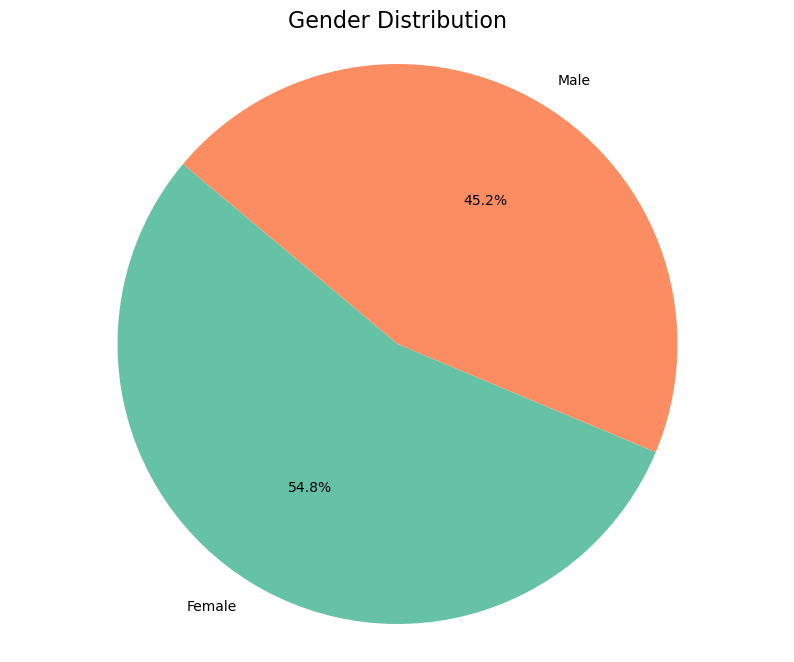

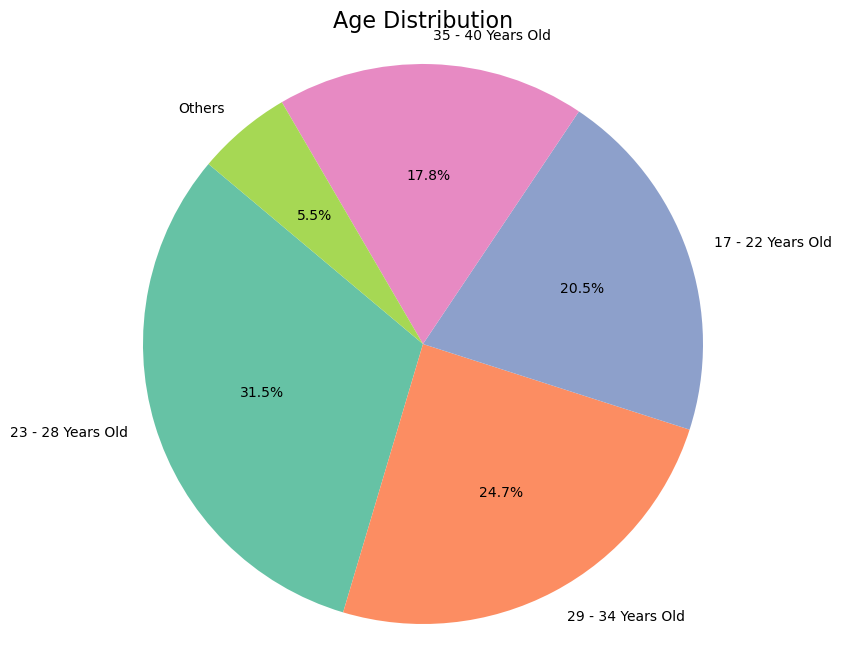

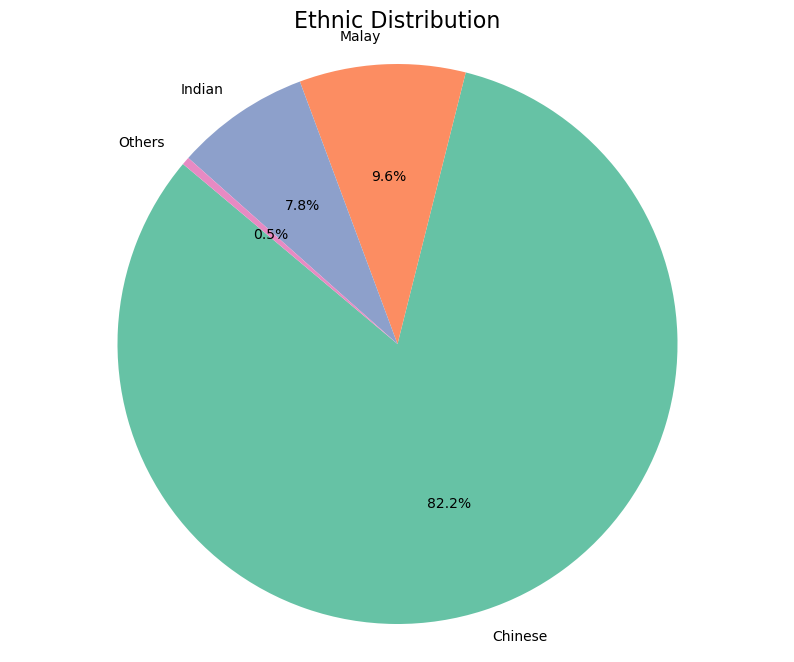

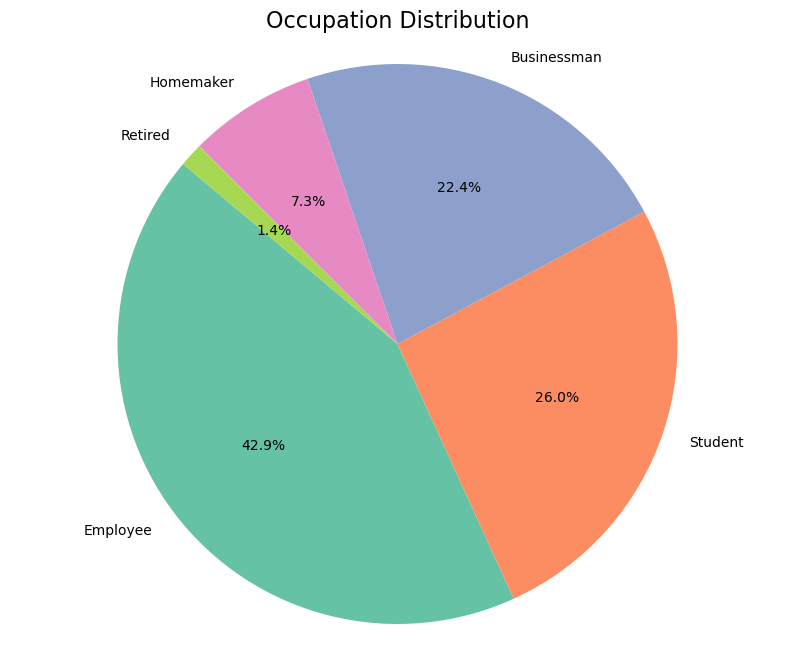

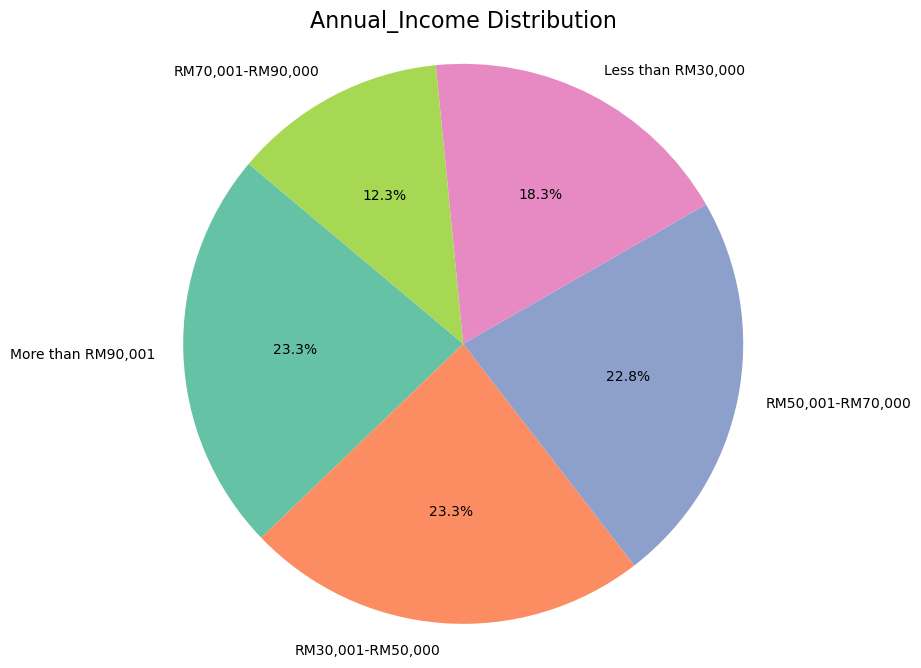

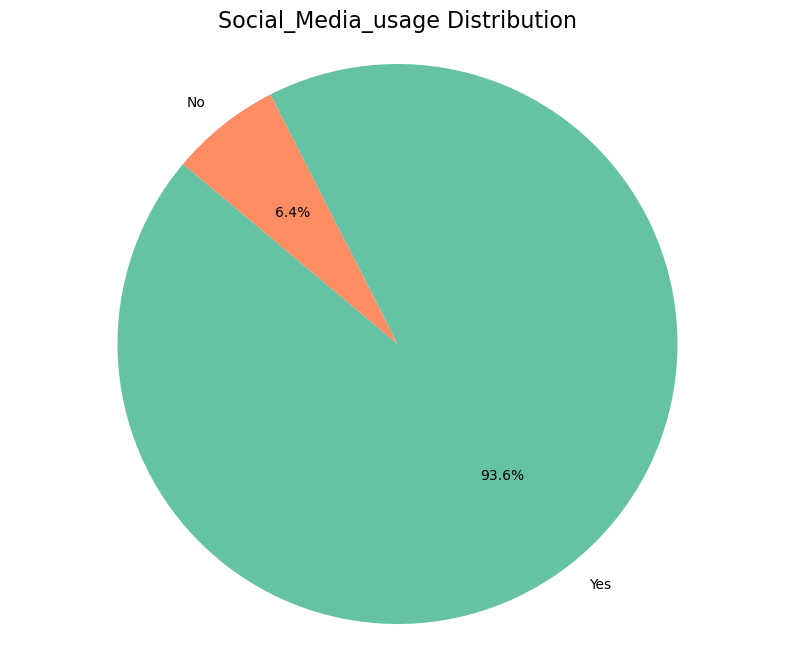

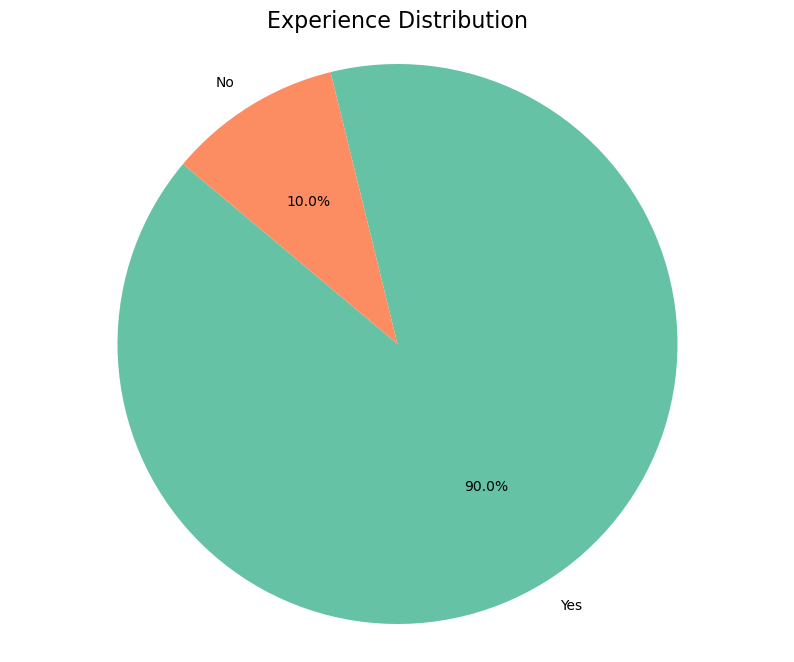

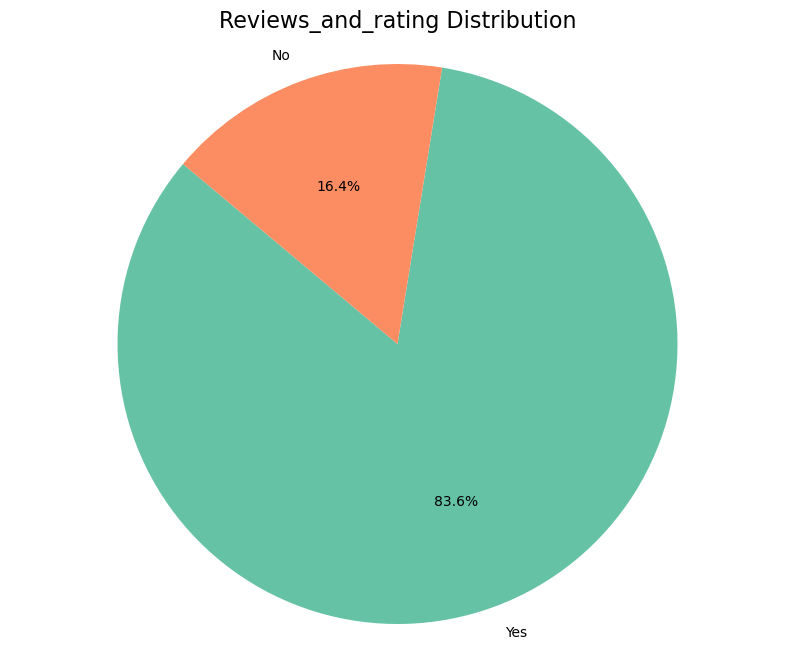

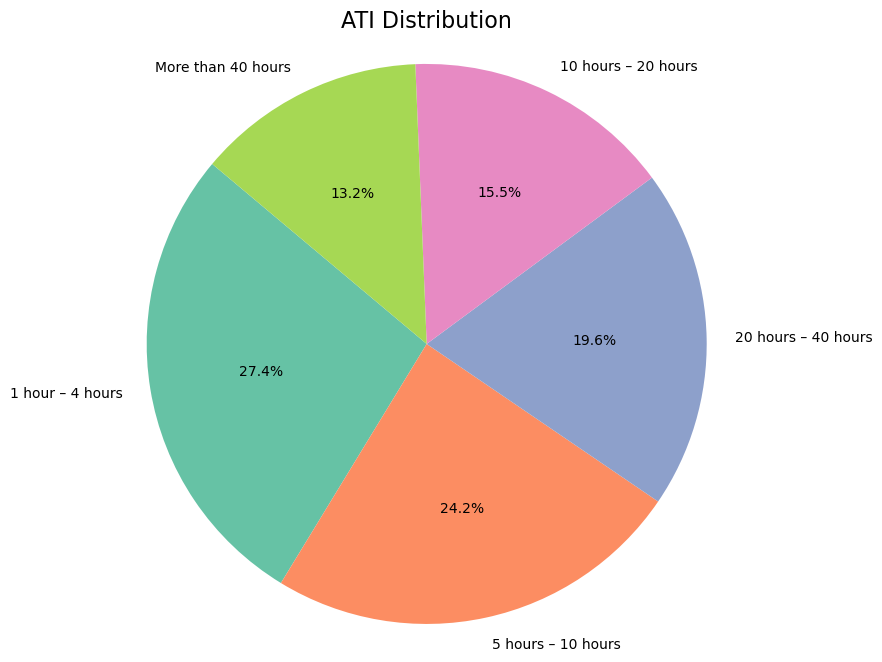

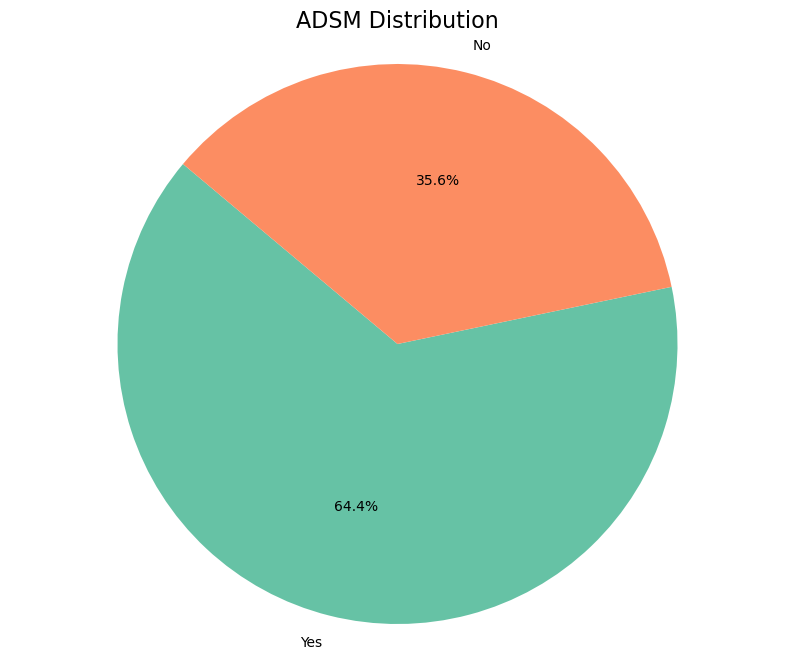

In [34]:

import pandas as pd
import matplotlib.pyplot as plt

features = ['Gender', 'Age', 'Ethnic','Occupation', 'Annual_Income', 'Social_Media_usage', 'Experience', 'Reviews_and_rating', 'ATI', 'ADSM']

for f in features:
    plt.figure(figsize=(10,8)) # Larger figure size for better visibility

    # Calculate counts and convert to percentage
    counts = df2[f].value_counts(normalize=True) * 100

    # Plotting pie chart with percentage labels
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
    plt.title(f'{f} Distribution', fontsize=16) # Add a title to the plot

    # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.axis('equal')

    plt.show()


#Attitude(ATTD) response

<Figure size 1900x1000 with 0 Axes>

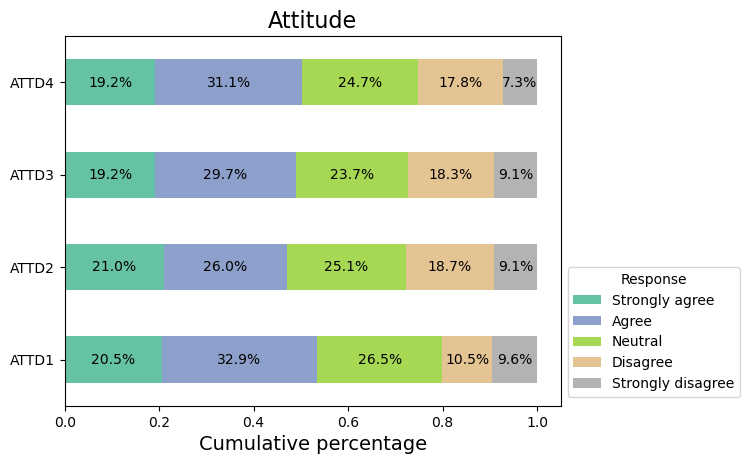

In [35]:



features = ['ATTD1', 'ATTD2', 'ATTD3', 'ATTD4']
response_categories = ['Strongly agree','Agree','Neutral','Disagree', 'Strongly disagree',]  # Define categories in order

# Create an empty DataFrame to store the counts for each feature
counts_df = pd.DataFrame()

# Calculate the counts for each feature and store them in counts_df
for f in features:
    count_series = df2[f].value_counts(normalize=True)
    count_series = count_series.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    counts_df[f] = count_series

# Transpose the DataFrame so that the features are on the X-axis and the counts are on the Y-axis
counts_df = counts_df.T

# Rename the feature names
counts_df.index = ['ATTD1',
                   'ATTD2',
                   'ATTD3',
                   'ATTD4']

# Plot the stacked divided bar chart
plt.figure(figsize=(19,10))

ax = counts_df.plot(kind='barh', stacked=True, colormap='Set2')

plt.xlabel('Cumulative percentage', fontsize=14)
# plt.ylabel("Attitude related questions",fontsize=14)
plt.title('Attitude', fontsize=16)
plt.legend(title='Response', loc='center left', bbox_to_anchor=(1.0, .2))

# Annotate the counts on the bars for better visualization
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1%}'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

plt.show()









In [36]:
counts_df.head()

ATTD1,Strongly agree,Agree,Neutral,Disagree,Strongly disagree
ATTD1,0.205479,0.328767,0.264840,0.105023,0.095890
ATTD2,0.210046,0.260274,0.251142,0.187215,0.091324
ATTD3,0.191781,0.296804,0.237443,0.182648,0.091324
ATTD4,0.191781,0.310502,0.246575,0.178082,0.073059


#Social Norm(SN) response

<Figure size 1900x1000 with 0 Axes>

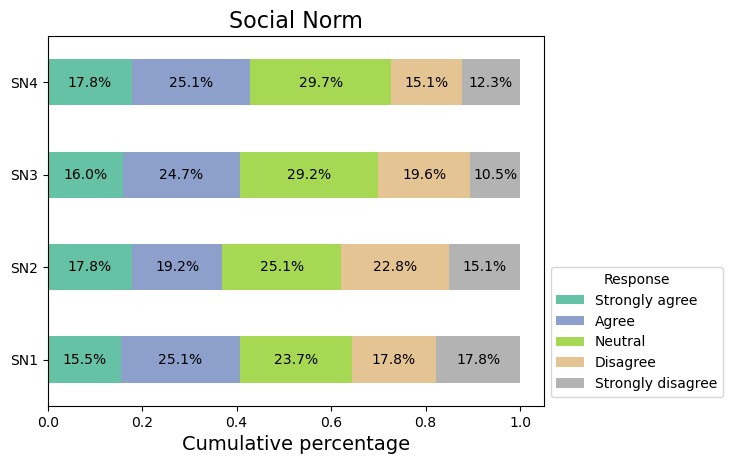

In [37]:
features = ['SN1', 'SN2', 'SN3', 'SN4']
response_categories = ['Strongly agree','Agree','Neutral','Disagree', 'Strongly disagree',]  # Define categories in order

# Create an empty DataFrame to store the counts for each feature
counts_df = pd.DataFrame()

# Calculate the counts for each feature and store them in counts_df
for f in features:
    count_series = df2[f].value_counts(normalize=True)
    count_series = count_series.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    counts_df[f] = count_series

# Transpose the DataFrame so that the features are on the X-axis and the counts are on the Y-axis
counts_df = counts_df.T

# Rename the feature names
counts_df.index = ['SN1',
                   'SN2',
                   'SN3',
                   'SN4']
counts_df.head()

# Plot the stacked divided bar chart
plt.figure(figsize=(19,10)) # Increase the figure size for better visibility
# sns.set_style('whitegrid') # Set grid style for better visibility

ax = counts_df.plot(kind='barh', stacked=True, colormap='Set2') # Change kind to 'barh'

plt.xlabel('Cumulative percentage', fontsize=14) # Increase fontsize for better visibility
# plt.ylabel("Socail Norm related questions",fontsize=14)
plt.title('Social Norm', fontsize=16) # Add title to the plot
plt.legend(title='Response', loc='center left', bbox_to_anchor=(1.0, .2)) # Move legend box outside of the plot

# Annotate the counts on the bars for better visualization
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1%}'.format(width), # Change format to percentage
            horizontalalignment='center',
            verticalalignment='center')

# plt.tight_layout() # To make sure everything fits without being cut-off
plt.show()


In [38]:
counts_df.head()

SN1,Strongly agree,Agree,Neutral,Disagree,Strongly disagree
SN1,0.155251,0.251142,0.237443,0.178082,0.178082
SN2,0.178082,0.191781,0.251142,0.228311,0.150685
SN3,0.159817,0.246575,0.292237,0.196347,0.105023
SN4,0.178082,0.251142,0.296804,0.150685,0.123288


#Perceived Behavioral Control(PBC) response

<Figure size 1900x1000 with 0 Axes>

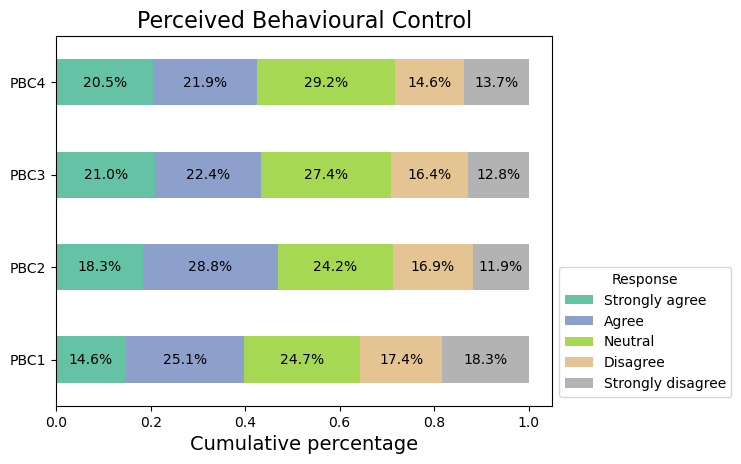

In [39]:


features = ['PBC1', 'PBC2', 'PBC3', 'PBC4']

response_categories = ['Strongly agree','Agree','Neutral','Disagree', 'Strongly disagree',]  # Define categories in order

# Create an empty DataFrame to store the counts for each feature
counts_df = pd.DataFrame()

# Calculate the counts for each feature and store them in counts_df
for f in features:
    count_series = df2[f].value_counts(normalize=True)
    count_series = count_series.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    counts_df[f] = count_series
# Transpose the DataFrame so that the features are on the X-axis and the counts are on the Y-axis
counts_df = counts_df.T

# Rename the feature names
counts_df.index = ['PBC1',
                   'PBC2',
                   'PBC3',
                   'PBC4']

# Plot the stacked divided bar chart
plt.figure(figsize=(19,10)) # Increase the figure size for better visibility
# sns.set_style('whitegrid') # Set grid style for better visibility

ax = counts_df.plot(kind='barh', stacked=True, colormap='Set2') # Change kind to 'barh'

plt.xlabel('Cumulative percentage', fontsize=14) # Increase fontsize for better visibility
# plt.ylabel("Perceived Behavioral Control related questions",fontsize=14)
plt.title('Perceived Behavioural Control', fontsize=16) # Add title to the plot
plt.legend(title='Response', loc='center left', bbox_to_anchor=(1.0, .2)) # Move legend box outside of the plot

# Annotate the counts on the bars for better visualization
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1%}'.format(width), # Change format to percentage
            horizontalalignment='center',
            verticalalignment='center')

# plt.tight_layout() # To make sure everything fits without being ct-off
plt.show()

In [40]:
counts_df.head()

PBC1,Strongly agree,Agree,Neutral,Disagree,Strongly disagree
PBC1,0.146119,0.251142,0.246575,0.173516,0.182648
PBC2,0.182648,0.287671,0.242009,0.168950,0.118721
PBC3,0.210046,0.223744,0.273973,0.164384,0.127854
PBC4,0.205479,0.219178,0.292237,0.146119,0.136986


#Purchase Behavior(PB) response

<Figure size 1900x1000 with 0 Axes>

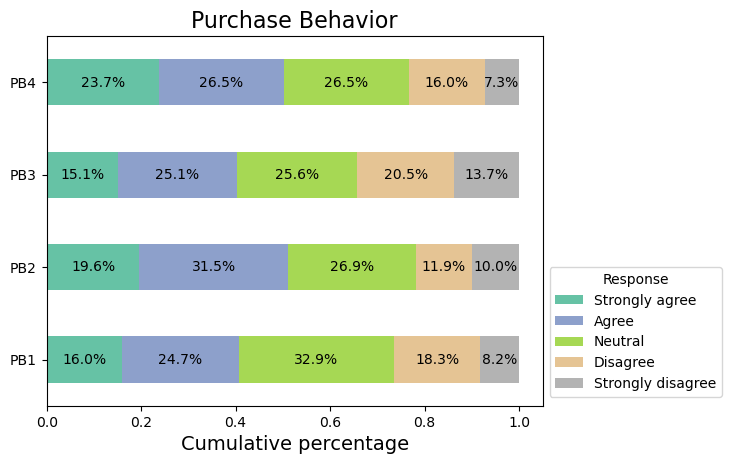

In [41]:

features = ['PB1', 'PB2', 'PB3', 'PB4']

response_categories = ['Strongly agree','Agree','Neutral','Disagree', 'Strongly disagree',]  # Define categories in order

# Create an empty DataFrame to store the counts for each feature
counts_df = pd.DataFrame()

# Calculate the counts for each feature and store them in counts_df
for f in features:
    count_series = df2[f].value_counts(normalize=True)
    count_series = count_series.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    counts_df[f] = count_series
# Transpose the DataFrame so that the features are on the X-axis and the counts are on the Y-axis
counts_df = counts_df.T

# Rename the feature names
counts_df.index = ['PB1',
                   'PB2',
                   'PB3',
                   'PB4']

# Plot the stacked divided bar chart
plt.figure(figsize=(19,10)) # Increase the figure size for better visibility
# sns.set_style('whitegrid') # Set grid style for better visibility

ax = counts_df.plot(kind='barh', stacked=True, colormap='Set2') # Change kind to 'barh'

plt.xlabel('Cumulative percentage', fontsize=14) # Increase fontsize for better visibility
# plt.ylabel("Purchase Behavior related questions",fontsize=14)
plt.title('Purchase Behavior', fontsize=16) # Add title to the plot
plt.legend(title='Response', loc='center left', bbox_to_anchor=(1.0, .2)) # Move legend box outside of the plot

# Annotate the counts on the bars for better visualization
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1%}'.format(width), # Change format to percentage
            horizontalalignment='center',
            verticalalignment='center')

# plt.tight_layout() # To make sure everything fits without being cut-off
plt.show()

In [42]:
counts_df.head()

PB1,Strongly agree,Agree,Neutral,Disagree,Strongly disagree
PB1,0.159817,0.246575,0.328767,0.182648,0.082192
PB2,0.196347,0.315068,0.269406,0.118721,0.100457
PB3,0.150685,0.251142,0.255708,0.205479,0.136986
PB4,0.237443,0.264840,0.264840,0.159817,0.073059


# DATA PREPROCESSING

In [43]:
#replacing the categorical value of PB, ATTD, SN and PBC to numerical value
df2 = df2.replace('Strongly agree',5)
df2 = df2.replace('Agree',4)
df2 = df2.replace('Neutral',3)
df2 = df2.replace('Disagree',2)
df2 = df2.replace('Strongly disagree',1)

In [44]:
# Merging PB1, PB2, PB3, PB4 to PB
df2['PB'] = df2['PB1'] + df2['PB2']+ df2['PB3']+ df2['PB4']

In [45]:
#Diving the PB target attribute to two class High and Low,
#and Appending a new target attribute PB-inf
rating = []
for row in df2['PB']:
    if row<=12:
        rating.append('LOW')
    else:
        rating.append('HIGH')
df2['PB-inf'] = rating

In [46]:
df2['PB-inf'].value_counts()
df2.head()

,Gender,Age,Ethnic,Occupation,Annual_Income,Social_Media_usage,Experience,Reviews_and_rating,ATI,ADSM,...,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4,PB,PB-inf
0,Female,29 - 34 Years Old,Chinese,Homemaker,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,3,3,3,3,3,3,3,3,12,LOW
1,Male,23 - 28 Years Old,Chinese,Student,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,1,2,4,3,3,4,2,2,15,HIGH
2,Female,29 - 34 Years Old,Chinese,Homemaker,"Less than RM30,000",Yes,Yes,Yes,5 hours – 10 hours,No,...,1,1,1,1,1,1,1,1,5,LOW
3,Male,35 - 40 Years Old,Malay,Businessman,"More than RM90,001",Yes,Yes,No,1 hour – 4 hours,Yes,...,3,3,4,4,3,4,3,4,15,HIGH
4,Female,23 - 28 Years Old,Chinese,Employee,"RM70,001-RM90,000",Yes,Yes,Yes,10 hours – 20 hours,No,...,3,2,3,3,3,4,4,4,16,HIGH


#Barplot

<Axes: xlabel='PB', ylabel='Age'>

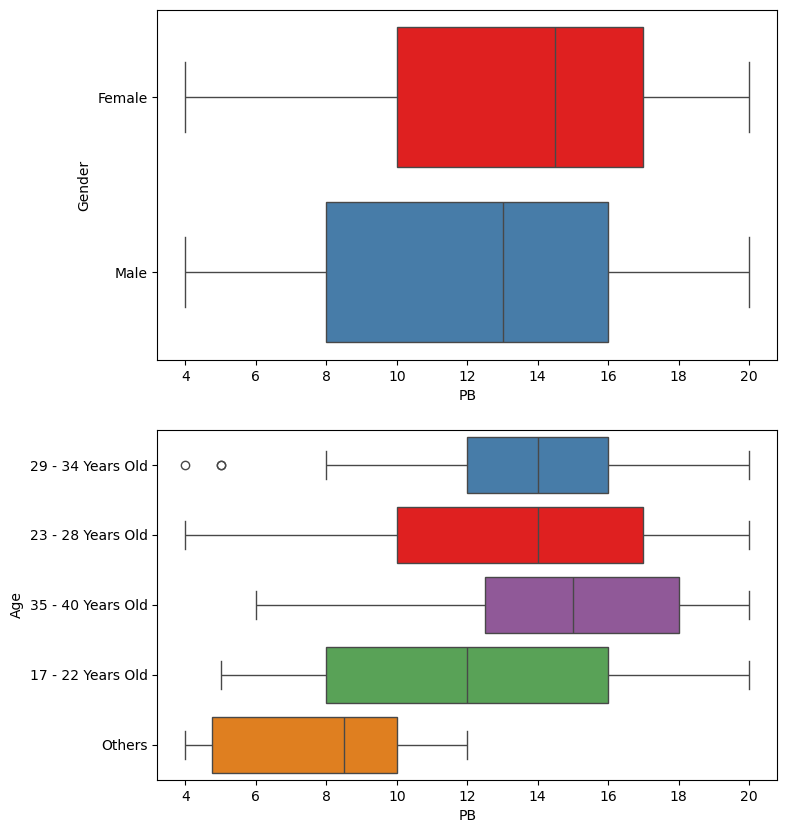

In [47]:


#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

#create boxplot in each subplot
sns.boxplot(data=df2, x='PB', y='Gender', ax=axes[0],palette={"Female": "r", "Male" : "#377eb8"})
sns.boxplot(data=df2, x='PB', y='Age', ax=axes[1],palette={'29 - 34 Years Old':"#377eb8", '23 - 28 Years Old':"r", '35 - 40 Years Old':"#984ea3", '17 - 22 Years Old':"#4daf4a", 'Others':"#ff7f00"})
# sns.boxplot(data=df2, x='PB', y='Occupation', ax=axes[1,0])
# sns.boxplot(data=df2, x='PB', y='Annual_Income', ax=axes[1,1])

<Axes: xlabel='PB', ylabel='ADSM'>

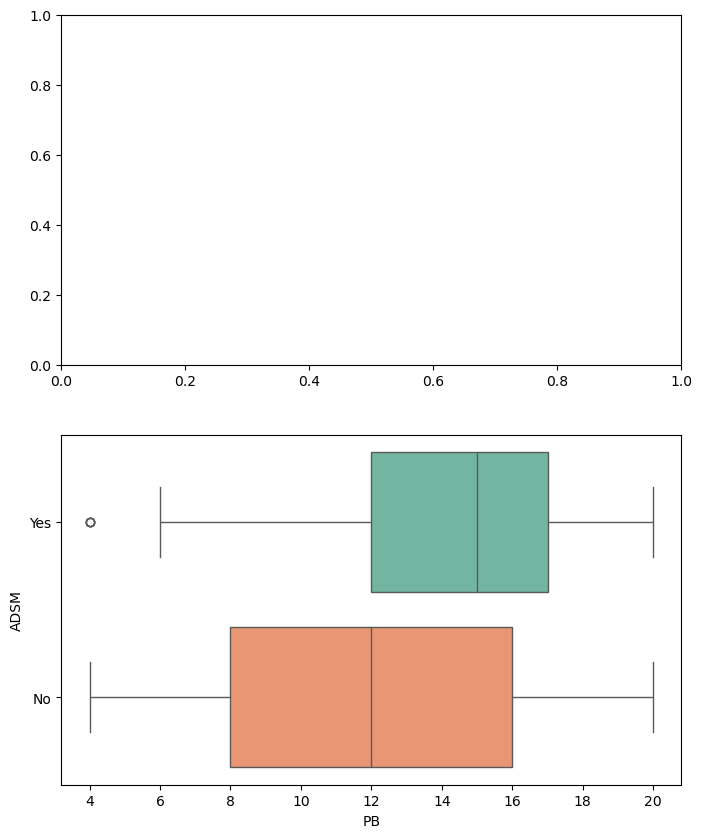

In [48]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

#create boxplot in each subplot
# sns.boxplot(data=df2, x='PB', y='Social_Media_usage', ax=axes[0,0])
# sns.boxplot(data=df2, x='PB', y='Reviews_and_rating', ax=axes[0,1])
# sns.boxplot(data=df2, x='PB', y='ATI', ax=axes[1,0])
sns.boxplot(data=df2, x='PB', y='ADSM', ax=axes[1],palette={"Yes": "#66c2a5", "No" : "#fc8d62"})

<Axes: xlabel='PB', ylabel='Ethnic'>

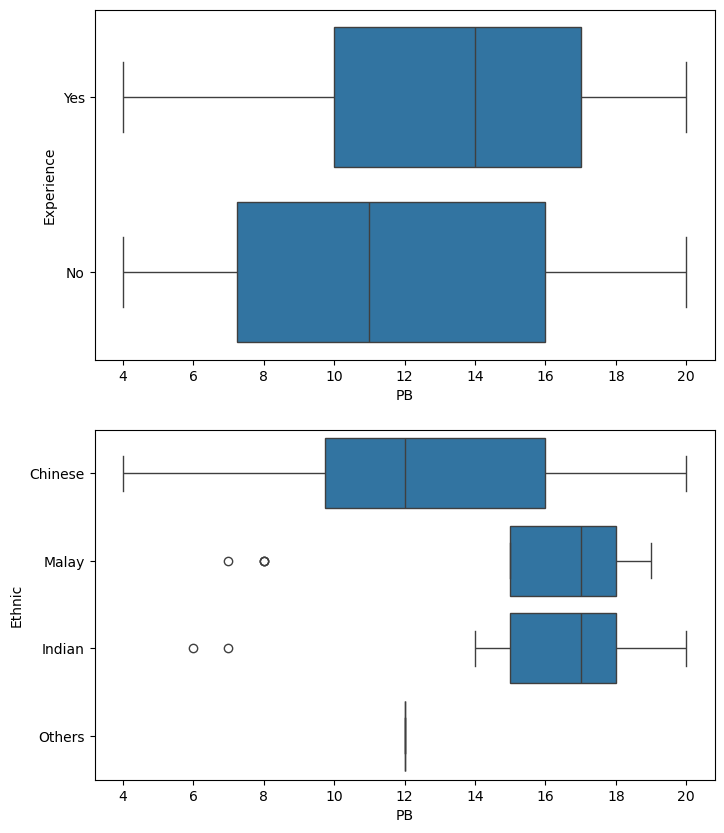

In [49]:
#define plotting region (2 rows, 1 columns)
fig, axes = plt.subplots(2, 1, figsize=(8 ,10))

#create boxplot in each subplot
sns.boxplot(data=df2, x='PB', y='Experience', ax=axes[0])
sns.boxplot(data=df2, x='PB', y='Ethnic', ax=axes[1])